In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\sp500sub.csv", index_col='Date', parse_dates=True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name'], dtype='object')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [4]:
df['Name'].unique()

array(['INCY', 'GILD', 'DXC', 'AFL', 'XYL', 'ARE', 'AMD', 'WYNN', 'IBM',
       'ATVI', 'AES', 'GPC', 'PRU', 'HST', 'WMB', 'GOOG', 'SRE', 'HSIC',
       'UNP', 'UPS', 'K', 'LYB', 'MDT', 'COF', 'HAS', 'CSX', 'GT', 'SYF',
       'EBAY', 'KSS', 'AJG', 'JWN', 'SBUX', 'IT', 'PH', 'DVN', 'MMM',
       'SPG', 'AKAM', 'IP', 'CPB', 'KMI', 'AAPL', 'NEM', 'KMX', 'TSCO',
       'SYY', 'VNO', 'NWS', 'NBL', 'ACN', 'APH', 'PDCO', 'WLTW', 'FIS',
       'URI', 'CBOE', 'FISV', 'BA', 'UAA', 'CVS', 'WU', 'SLB', 'AIV',
       'VLO', 'MU', 'CAH', 'AZO', 'CCI', 'ZTS', 'MCO', 'ALLE', 'RHI',
       'UAL', 'IR', 'CB', 'VMC', 'GD', 'AAP', 'NEE', 'ABT', 'WFC', 'DIS',
       'SNA', 'MAR', 'JPM', 'CLX', 'KIM', 'SCG', 'HBI', 'ABBV', 'RSG',
       'ETR', 'ADBE', 'COO', 'HLT', 'INTU', 'SLG', 'GWW', 'COG', 'CBS',
       'FB', 'CMS', 'MDLZ'], dtype=object)

In [5]:
names = ['GOOG', 'SBUX', 'KSS', 'NEM']

In [6]:
# RETURNS OVER A 6MONTH PERIOD
252/2

126.0

In [7]:
all_dates = df.index.unique().sort_values()
len(all_dates)

# includes all days, even non-trading days
# duplicates

2267

In [8]:
all_dates

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2267, freq=None)

In [9]:
print(all_dates.get_loc('2014-01-02'))
print(all_dates.get_loc('2014-06-30'))

1007
1130


In [10]:
start = all_dates.get_loc('2014-01-02')
end = all_dates.get_loc('2014-06-30')
dates = all_dates[start:end+1]

In [11]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
len(dates)

124

In [13]:
close_prices = pd.DataFrame(index=dates)
close_prices.head()

""
Date
2014-01-02
2014-01-03
2014-01-06
2014-01-07
2014-01-08


In [14]:
for name in names:
    tmpl = df.loc[dates]
    df_sym = tmpl[tmpl['Name'] == name]
    df_tmp = pd.DataFrame(data=df_sym['Close'].to_numpy(), \
                        index=df_sym.index, columns=[name]) # tmp df to store closed prices
    close_prices = close_prices.join(df_tmp) # left-join by default
    
close_prices.head()

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-02,554.481689,38.584999,56.990002,23.959999
2014-01-03,550.436829,38.474998,56.860001,23.920000
2014-01-06,556.573853,38.084999,56.040001,24.080000
2014-01-07,567.303589,38.605000,56.099998,23.950001
2014-01-08,568.484192,39.014999,55.180000,23.400000


In [15]:
# check for n/a values
close_prices.isna().sum().sum()

0

In [16]:
# if na values

close_prices.fillna(method='ffill', inplace=True)
close_prices.fillna(method='bfill', inplace=True)
close_prices.isna().sum().sum()

0

In [17]:
# empty df storing just the returns

returns = pd.DataFrame(index=dates[1:]) #since returns has 1 less rows than prices, we'll index the dates starting from 1

In [18]:
for name in names:
    # log returns
    current_returns = close_prices[name].pct_change()
    returns[name] = current_returns.iloc[1:] * 100 # *100 to see %
    
returns.head()

# larger results, percentages

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-03,-0.729485,-0.285086,-0.228112,-0.166941
2014-01-06,1.114937,-1.013644,-1.442138,0.668896
2014-01-07,1.927819,1.365368,0.107062,-0.539864
2014-01-08,0.208108,1.062038,-1.639925,-2.296456
2014-01-09,-0.962997,-0.551071,0.688657,-0.854696


In [19]:
# mean daily return
mean_return = returns.mean()

mean_return

GOOG    0.038691
SBUX    0.009955
KSS    -0.053793
NEM     0.072932
dtype: float64

In [20]:
cov = returns.cov()
cov

,GOOG,SBUX,KSS,NEM
GOOG,2.206565,0.832469,0.771772,-0.033600
SBUX,0.832469,1.558406,0.714586,0.374448
KSS,0.771772,0.714586,2.025854,0.180308
NEM,-0.033600,0.374448,0.180308,4.815104


In [21]:
cov_np = cov.to_numpy()
cov_np

array([[ 2.20656478,  0.832469  ,  0.77177157, -0.03360028],
       [ 0.832469  ,  1.55840635,  0.71458628,  0.37444817],
       [ 0.77177157,  0.71458628,  2.02585403,  0.18030838],
       [-0.03360028,  0.37444817,  0.18030838,  4.81510393]])

In [22]:
N = 10000
D = len(mean_return) # number of assets
returns = np.zeros(N)  # empty array to store returns
risks = np.zeros(N) # store risks
random_weights = []
for i in range(N): # loop generating random weight vector
    rand_range = 1.0 # variable
    w = np.random.random(D)*rand_range - rand_range/2 # random vector w by taking  uniform dist*rann_range...
    # if rand_range = 1 --> w[-0.5, 0.5], with short-selling
    w[-1] = 1 - w[:-1].sum() # change last value of w to be 1 - sum of other value --> w sum to 1
    np.random.shuffle(w) # shuffle w in case biais towards last value --> visible for each asset
    random_weights.append(w)
    ret = mean_return.dot(w) # calculate portforlio return
    risk = np.sqrt(w.dot(cov_np).dot(w)) # portforlio risk
    returns[i] = ret
    risks[i] = risk

In [23]:
# calculate returns and risk for single assets in portfolios

single_asset_returns = np.zeros(D)
single_asset_risks = np.zeros(D)
for i in range(D):
    ret = mean_return[i]
    risk = np.sqrt(cov_np[i, i]) # variance
    
    single_asset_returns[i] = ret
    single_asset_risks[i] = risk

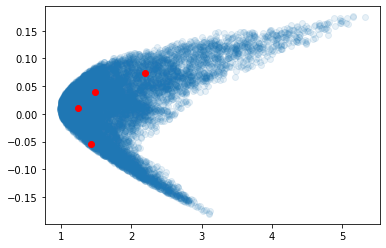

In [24]:
plt.scatter(risks, returns, alpha=0.1)
plt.scatter(single_asset_risks, single_asset_returns, c='red')

# markowitz bullet, graphs shows by diversying, reduce risk but receive same returns

### Max and Min Return

In [25]:
from scipy.optimize import linprog

In [26]:
D = len(mean_return) # number of assets in pf

In [27]:
# A_eq[1, 1, 1] * x(weights) = b_eq(Always 1)

A_eq = np.ones((1, D))
b_eq = np.ones(1)

print(A_eq)
print(b_eq)

[[1. 1. 1. 1.]]
[1.]


In [28]:
### Note: bounds are by default (0, None) unless otherwise specified.
# bounds = None
bounds = [(-0.5, None)]*D
bounds

[(-0.5, None), (-0.5, None), (-0.5, None), (-0.5, None)]

In [29]:
# minimize

res = linprog(mean_return, A_eq=A_eq,b_eq=b_eq, bounds=bounds)
res

# --> optimal value of the weights (sums to 1)

     con: array([-3.40705242e-11])
     fun: -0.19527252346171137
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([-0.5, -0.5,  2.5, -0.5])

In [30]:
# optimal value of the objective

min_return = res.fun

In [31]:
# maximize

res = linprog(-mean_return, A_eq=A_eq,b_eq=b_eq, bounds=bounds)
res

     con: array([-1.90201188e-11])
     fun: -0.18490322421785924
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([-0.5, -0.5, -0.5,  2.5])

In [32]:
# optimal value of the objective

max_return = -res.fun

In [33]:
min_return, max_return

(-0.19527252346171137, 0.18490322421785924)

## Mean-Variance Optimal Portfolios

In [34]:
N = 100
target_returns = np.linspace(min_return, max_return, num=N)

In [35]:
from scipy.optimize import minimize

In [36]:
def get_portfolio_variance(weights):
    return weights.dot(cov).dot(weights) # define function to pass optimizer --> pf variance

In [37]:
def target_return_constraint(weights, target):
    return weights.dot(mean_return) - target # --> represent constraint --> should return 0 when constraint is met

In [38]:
def portfolio_constraint(weights):
    return weights.sum() - 1 # weights sum should equal 1 --> return 0

In [39]:
# list of constraints to pass into optimizer
# 1st constraint = target_return constraint
# 2nd equality contraint for the sum of the weights

constraints = [
    {'type': 'eq',
     'fun': target_return_constraint,
     'args': [target_returns[0]], # will be updated in loop
    },
    {
        'type': 'eq',
        'fun': portfolio_constraint,
    }
]

In [40]:
# check if it works

res = minimize(
      fun=get_portfolio_variance, # function we want to optimize
      x0=np.ones(D) / D, # initial guess for the weight
      method='SLSQP',
      constraints=constraints,
)
res

# fun --> min variance we were able to achieve
# actual weights to achieve variance

     fun: 10.28441988991613
     jac: array([-0.60498893,  1.99568546,  7.76491153, -3.70373178])
 message: 'Optimization terminated successfully'
    nfev: 42
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([-1.04022885,  0.28018138,  2.2582534 , -0.49820593])

In [41]:
res = minimize(
      fun=get_portfolio_variance, # function we want to optimize
      x0=np.ones(D) / D, # initial guess for the weight
      method='SLSQP',
      constraints=constraints,
      bounds=bounds, # same bounds as earlier linear program
)
res

# weights don't go below -0.5
# variance went up

     fun: 11.226599264686193
     jac: array([ 0.85342443,  0.80760777,  8.46260405, -4.25440979])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-0.5       , -0.49999999,  2.49999999, -0.5       ])

In [42]:
# run through all our targets returns to generate efficient frontier

optimized_risks = []
for target in target_returns:
    # set target return constraint
    constraints[0]['args'] = [target]
    
    res = minimize(
      fun=get_portfolio_variance, # function we want to optimize
      x0=np.ones(D) / D, # initial guess for the weight
      method='SLSQP',
      constraints=constraints,
      bounds=bounds, # same bounds as earlier linear program
    )
    optimized_risks.append(np.sqrt(res.fun)) 
    if res.status !=0:
        print(res) # if something went wrong

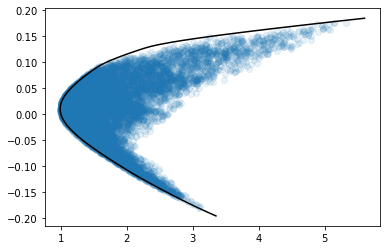

In [43]:
# efficient frontier plot
plt.scatter(risks, returns, alpha=0.1)
plt.plot(optimized_risks, target_returns, c='black')

# line traces out efficient frontier + negative side as well

## GMV Portfolio

In [44]:
# Min variance portfolio
# Let's limit the magnitude of the weights

res = minimize(
      fun=get_portfolio_variance, # function we want to optimize
      x0=np.ones(D) / D, # initial guess for the weight
      method='SLSQP',
      constraints = {
          'type': 'eq',
          'fun': portfolio_constraint,
      },
      bounds=bounds, # same bounds as earlier linear program
)
res

     fun: 0.9782928256403252
     jac: array([1.95658569, 1.95658569, 1.9565857 , 1.95658569])
 message: 'Optimization terminated successfully'
    nfev: 23
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.2234007 , 0.34897125, 0.25976249, 0.16786556])

In [45]:
mv_risk = np.sqrt(res.fun) # min risk
mv_weights = res.x
mv_ret = mv_weights.dot(mean_return) # return

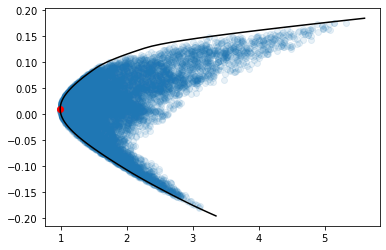

In [46]:
# risk return plot

plt.scatter(risks, returns, alpha=0.1)
plt.plot(optimized_risks, target_returns, c='black')
plt.scatter([mv_risk], [mv_ret], c='red')

# GMV located at the bottom of the efficient frontier

## Sharpe Ratio

In [47]:
risk_free_rate = 0.03 / 252

def neg_sharpe_ratio(weights):
    mean = weights.dot(mean_return)
    sd = np.sqrt(weights.dot(cov).dot(weights))
    return - (mean - risk_free_rate) / sd

In [48]:
# to find max sharpe ratio

res = minimize(
      fun=neg_sharpe_ratio, # function we want to optimize
      x0=np.ones(D) / D, # initial guess for the weight
      method='SLSQP',
      constraints = {
          'type': 'eq',
          'fun': portfolio_constraint,
      },
      bounds=bounds, # same bounds as earlier linear program
)
res



     fun: -0.059207597379034915
     jac: array([0.00937157, 0.00929031, 0.02811907, 0.00926263])
 message: 'Optimization terminated successfully'
    nfev: 80
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([ 0.84222834,  0.11832914, -0.5       ,  0.53944252])

In [49]:
# best sharpe ration, corresponding weight
best_sr, best_w = -res.fun, res.x

In [51]:
mc_best_w = None # Monte-Carlo approach
mc_best_sr = float('-inf')
for i, (risk, ret) in enumerate(zip(risks, returns)):
    sr = (ret - risk_free_rate) / risk
    if sr > mc_best_sr:
        mc_best_sr = sr
        mc_best_w = random_weights[i]
print(mc_best_w, mc_best_sr)

[ 0.75768562  0.2494956  -0.47958644  0.47240521] 0.058499287762919794


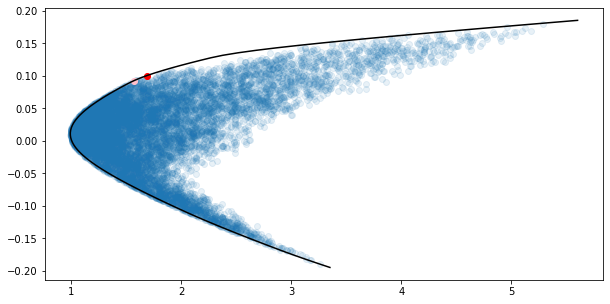

In [52]:
#scatter plot of all random portfolios
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(risks, returns, alpha=0.1)

#plot efficient frontier
plt.plot(optimized_risks, target_returns, c='black')

# portfolio with max sharpe ratio found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red')

# found by monte carlo simulation
mc_risk = np.sqrt(mc_best_w.dot(cov).dot(mc_best_w))
mc_ret = mean_return.dot(mc_best_w)
plt.scatter([mc_risk], [mc_ret], c ='pink')

# portfolio with max sharpe ratio falls along efficient frontier
# if not, wrong answer --> good sanity check
# mc point pretty close to opt point --> if opt was not usable, mc would give a reasonable answer

## Risk-free asset with tangency portfolio

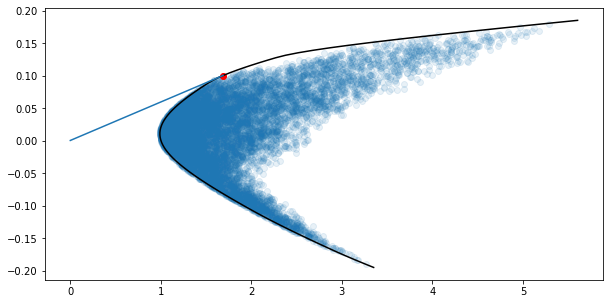

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(risks, returns, alpha=0.1)
plt.plot(optimized_risks, target_returns, c='black')

# found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red')

# tangent line
x1 = 0
y1 = risk_free_rate
x2 = opt_risk
y2 = opt_ret
plt.plot([x1, x2], [y1, y2])

# tangent to efficient frontier
# an extended line beyond tangency pf would correspond to a scenario where...
# ... bowwow cash az risk-free rate to invest more into risk securities